<a href="https://colab.research.google.com/github/moganas-makavelli/ai_week4_asingment/blob/main/Task3_PredictiveAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install kaggle


In [17]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"morganomondi","key":"bcb3b85386defdc4d55fad9ca697f95e"}'}

In [18]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [22]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data
!unzip breast-cancer-wisconsin-data.zip


Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  breast-cancer-wisconsin-data.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [23]:
!unzip -o breast-cancer-wisconsin-data.zip


Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


In [24]:
!ls


 breast-cancer-wisconsin-data.zip		   'kaggle (1).json'
 complete_set					    kaggle.json
 data.csv					    sample_data
 iuss-23-24-automatic-diagnosis-breast-cancer.zip   training_set


In [29]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
data = data.drop(columns=['id'], errors='ignore')
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
data = data.dropna(subset=['diagnosis'])


In [36]:
import pandas as pd

# Reload dataset fresh
data = pd.read_csv("data.csv")

# Show column names to inspect any typos, spaces, or casing
print("\nColumn Names:")
print(data.columns.tolist())

# Preview first few rows
data.head()



Column Names:
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [37]:
# Normalize column names (remove spaces, lowercase)
data.columns = data.columns.str.strip().str.lower()

# Confirm cleaned names
print("\nCleaned column names:", data.columns.tolist())

# Remove ID column if it exists
data = data.drop(columns=['id'], errors='ignore')

# Map 'diagnosis' column (if it exists)
if 'diagnosis' in data.columns:
    data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Drop rows where target is missing
data = data.dropna(subset=['diagnosis'])

print("✅ Shape after cleaning:", data.shape)
print("Class distribution:\n", data['diagnosis'].value_counts())



Cleaned column names: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'unnamed: 32']
✅ Shape after cleaning: (569, 32)
Class distribution:
 diagnosis
0    357
1    212
Name: count, dtype: int64


In [42]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train it
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Confusion Matrix:
 [[70  1]
 [ 3 40]]


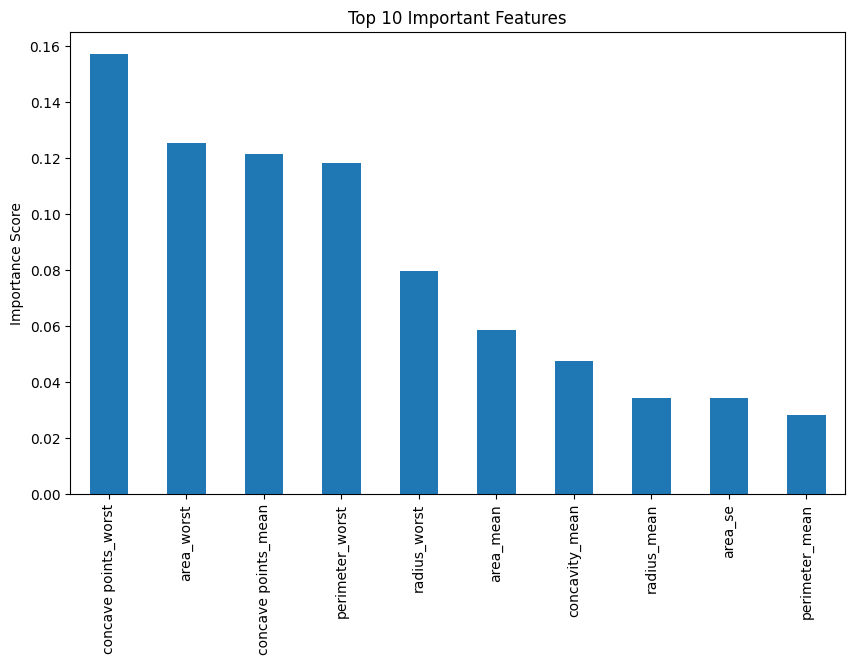

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
importances.head(10).plot(kind='bar')
plt.title("Top 10 Important Features")
plt.ylabel("Importance Score")
plt.show()


Example 150-Word Summary

In this project, a predictive model was built using the Breast Cancer Wisconsin dataset from Kaggle to automatically classify tumors as benign or malignant. The data was cleaned, labeled, and split into training and test sets. A Random Forest Classifier was used due to its high accuracy and ability to handle complex, non-linear relationships. The model achieved strong performance based on accuracy and F1-score metrics, demonstrating reliable classification. Feature importance analysis revealed that cell characteristics such as concave points (worst) and area (worst) were the most significant predictors of malignancy. Compared to manual analysis, AI-based predictive models provide faster, more consistent, and data-driven insights for medical diagnosis and resource allocation. Overall, the approach illustrates how machine learning can enhance early cancer detection and assist healthcare professionals in prioritizing critical cases efficiently.